In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read in the data
# Create a DataFrame
crypto_df = pd.read_csv(Path('Resources/crypto_data.csv'), index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Remove all rows that have at least one null value.
crypto_df.dropna(inplace=True)
crypto_df = crypto_df.drop("IsTrading", axis=1)
crypto_df

C:\Users\matt\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Check dtypes
crypto_df.dtypes

CoinName            object
Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [6]:
# Convert to numeric
crypto_df['TotalCoinSupply'] = pd.to_numeric(crypto_df['TotalCoinSupply'])
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
808,808,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Horizen,Equihash,PoW,7.296538e+06,2.100000e+07


In [7]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Horizen,Equihash,PoW,7.296538e+06,2.100000e+07


In [8]:
# delete the `CoinName` from the original dataframe
crypto_df.drop(columns='CoinName', inplace=True)
crypto_df

C:\Users\matt\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Equihash,PoW,7.296538e+06,2.100000e+07


In [9]:
# Create dummy variables for text features
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize data
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [11]:
# Use PCA to reduce dimensions to 90% principal components
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(X_scaled)

In [12]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features

array([[ 12.815825  ,  -9.582143  ],
       [ 13.748065  , -16.218002  ],
       [ 23.111412  , -10.417268  ],
       ...,
       [-22.995031  ,  -0.02467272],
       [ -6.907994  ,  15.81835   ],
       [  6.3581333 ,   9.174454  ]], dtype=float32)

In [13]:
# Prepare to plot the dataset

# The first column of transformed features
crypto_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_df['y'] = tsne_features[:,1]

C:\Users\matt\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\matt\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


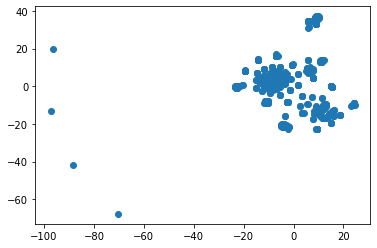

In [14]:
# Visualize the clusters
plt.scatter(crypto_df['x'], crypto_df['y'])
plt.show()

In [15]:
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,x,y
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,12.815825,-9.582143
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,13.748065,-16.218002
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,23.111412,-10.417268
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,8.727750,36.534016
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-19.336313,8.206820


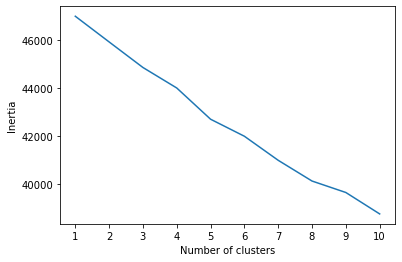

In [16]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()